In [82]:
import warnings
warnings.filterwarnings('ignore')

In [83]:
import pandas as pd
import numpy as np

In [89]:
df = pd.read_csv('life_all.csv')
df = df.set_index('구분1')
df.head()

1996 년  1997 년  1998 년  1999 년  2000 년  2001 년  2002 년  2003 년  2004 년  \
구분1                                                                           
강원     59.0    37.9    40.9    63.0    66.0    91.5   122.1   102.0   123.1   
경기    579.0   638.3   636.8   594.0   565.6   573.9   710.3   757.8   745.7   
경남    173.0   116.5   154.1   168.7   179.1   229.7   261.2   263.0   279.5   
경북     59.0    72.7    84.4   112.5   114.3   103.9   111.9   149.8   194.6   
광주     42.0    49.5    52.4    58.2    63.6    52.4   129.8   115.8   134.3   

     2005 년  ...  2012 년  2013 년  2014 년  2015 년  2016 년  2017 년  2018 년  \
구분1          ...                                                           
강원    126.0  ...   169.7   153.5   204.1   161.7   137.3   162.7   196.3   
경기    736.7  ...   816.8   803.8   842.9   847.3  1017.4  1129.9  1301.5   
경남    301.8  ...   374.4   310.2   360.9   307.6   336.4   331.2   335.0   
경북    208.7  ...   181.1   206.9   185.6   216.1   280.5   271.0   318.6   
광주    134.0  ...   124.1   133.4   128.9   141.6   138.5   119.8   135.3   

     2019 년     2020년     2021년  
구분1                              
강원    264.7  104507.8  114571.8  
경기   1572.0  674379.0  789086.5  
경남    409.1  160810.0  181060.0  
경북    320.6  146123.6  147046.8  
광주    129.6   51582.7   73882.0  

[5 rows x 26 columns]

# 1. 전처리

In [90]:
df['2020 년'] = df['2020년'].apply(lambda x: x / 365)
df['2021 년'] = df['2021년'].apply(lambda x: x / 365)

In [106]:
df.index.name = '지역'
df.drop(['2020년','2021년'], axis = 1, inplace = True)

#### Transpose 및 to_datetime

In [119]:
df_t = df.transpose()
df_t.index.name = '년도'

df_t.drop(['세종'], axis = 1, inplace = True ) #데이터 부족 
df_t['울산'] = df_t['울산'].replace(0, np.nan) #측정되지 않는 값

In [120]:
df_t.index = pd.to_datetime(df_t.index, format='%Y 년')
df_t.index = df_t.index.strftime('%Y년')

In [121]:
df_t.head()

지역       강원     경기     경남     경북    광주     대구     대전     부산     서울    울산  \
년도                                                                         
1996년  59.0  579.0  173.0   59.0  42.0  126.0  152.4  260.0  618.0   NaN   
1997년  37.9  638.3  116.5   72.7  49.5  131.3  156.5  249.0  599.4  61.8   
1998년  40.9  636.8  154.1   84.4  52.4  197.3  126.7  242.5  506.6  52.2   
1999년  63.0  594.0  168.7  112.5  58.2  244.5  136.3  290.3  589.2  66.9   
2000년  66.0  565.6  179.1  114.3  63.6  261.4  114.9  260.9  652.2  74.3   

지역        인천    전남    전북    제주    충남    충북  
년도                                          
1996년  100.0  79.0  63.0  19.9  64.0  48.9  
1997년  100.7  76.4  64.7  29.7  79.7  53.8  
1998년  152.9  85.8  64.5  14.9  77.0  73.0  
1999년  145.3  75.0  96.1  22.0  70.9  53.8  
2000년  201.9  73.3  92.5  16.2  77.7  55.1

# 2 - 1 시각화

In [144]:
import matplotlib.pyplot as plt
from matplotlib import rc  ### 한글 깨짐 문제 해결 
rc('font', family='AppleGothic') 			
plt.rcParams['axes.unicode_minus'] = False  


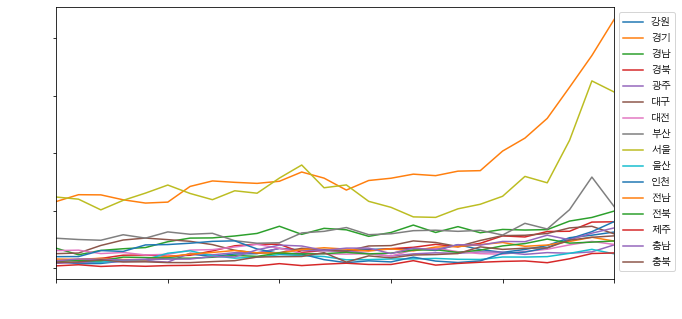

In [153]:

df_t.plot(figsize=(10,5)).autoscale(axis='x',tight=True);

plt.xlabel('연도', color='white')
plt.xticks(color='white')
plt.ylabel('배출량', color='white')
plt.yticks(color='white')



plt.xticks(rotation=0) #레이블 각도
plt.legend(bbox_to_anchor=(1,1)) #라벨 위치 변경 
 
plt.show()

서울 및 경기의 인구 수 상승으로 인하여 현대로 갈수록 급상승하는 추세를 보임. 비정상 시계열 차트임을 확인 할 수 있음.

#### 서울 및 경기

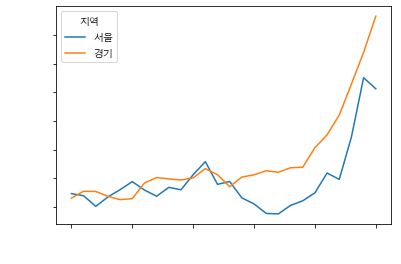

In [160]:
df_t[['서울','경기']].plot() #nouvelle trame de données
plt.xlabel('연도', color='white')
plt.xticks(color='white')
plt.ylabel('배출량', color='white')
plt.yticks(color='white')

plt.show()


경기의 경우 현대로 갈수록 강하게 증가하는 추세를 보이며 서울 또한 마찬가지이다. 데이터의 안정화가 필요함을 확인할 수 있다. 

#### 그 외

서울 및 경기 제외한 시각화 

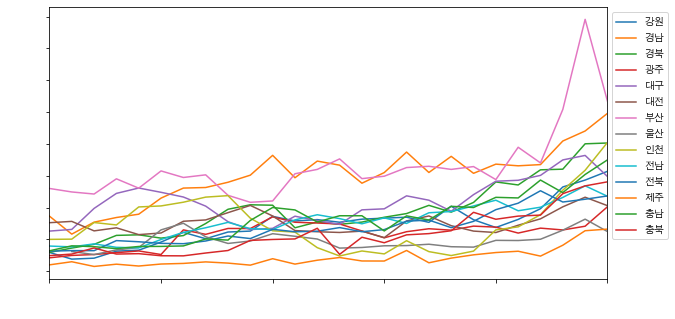

In [173]:
# 제외할 컬럼들
excluded_columns = ['서울', '경기']
# 추출할 컬럼들
selected_columns = [col for col in df_t.columns 
                    if col not in excluded_columns]

# 선택한 컬럼들로 데이터 프레임 생성
selected_df = df_t[selected_columns]

# 선택한 컬럼들 시각화
selected_df.plot(figsize=(10,5)).autoscale(axis='x',tight=True);

# 그래프 출력
plt.xlabel('연도', color='white')
plt.xticks(color='white')
plt.ylabel('배출량', color='white')
plt.yticks(color='white')
plt.legend(bbox_to_anchor=(1,1)) 


plt.show()


서울 및 경기를 제외한 도시들의 경우, 점진적으로 증가하는 추세를 보였고, 부산에서 일시적인 이상치를 발견하였다.  

# 3.  정상성 확인 및 모형 식별 

## 정상성 확인

#### ADF TEST(Augmented Dickey-Fuller Test)

- 귀무가설 Null hypothesis: 증명하고자 하는 가설의 반대되는 가설, 효과와 차이가 없는 가설. 기각에 실패하면 시계열이 비정상성(Non-stationary)임을 의미한다.
- 대립가설 Alternative hypothesis : 증명하고자 하는 가설. 귀무가설이 기각되고 시계열이 정상성(Stationary)임을 의미한다.

In [217]:
#울산(첫번째 값이 결측치이므로 따로 계산)
print('울산 ADF Test')
y = df_t['울산'].iloc[1:]  # 첫 번째 값 제외
y_1diff = df_t['울산'].diff().dropna()[1:]  

# 원 데이터에 대한 ADF 검정 수행
result = adfuller(y)
print(f'원 데이터 ADF Statistic: {result[0]:.3f}')
print(f'원 데이터 p-value: {result[1]:.3f}')
    
    # 1차 차분 데이터에 대한 ADF 검정 수행
result = adfuller(y_1diff)
print(f'1차 차분 ADF Statistic: {result[0]:.3f}')
print(f'1차 차분 p-value: {result[1]:.3f}')
print()


울산 ADF Test
원 데이터 ADF Statistic: -2.182
원 데이터 p-value: 0.213
1차 차분 ADF Statistic: -3.638
1차 차분 p-value: 0.005



In [235]:
from statsmodels.tsa.stattools import adfuller

# 1차 차분의 p-value 값이 0.05 이상인 컬럼들을 저장할 리스트
not_significant_columns = []



# 데이터프레임에 있는 모든 열(지역)에 대해 ADF 검정 수행
for column in df_t.columns:
    y = df_t[column]
    y_1diff = df_t[column].diff().dropna()

    print(f'{column} ADF Test')
    
    # 결측값이 있는 열은 제외하고 ADF 검정 수행
    if y.isnull().sum() > 0:
        print(f'{column} 칼럼에 결측값이 존재하여 분석을 수행할 수 없습니다.')
        print()
        continue
    
    # 원 데이터에 대한 ADF 검정 수행
    result = adfuller(y)
    print(f'원 데이터 ADF Statistic: {result[0]:.3f}')
    print(f'원 데이터 p-value: {result[1]:.3f}')
    
    # 1차 차분 데이터에 대한 ADF 검정 수행
    result = adfuller(y_1diff)
    print(f'1차 차분 ADF Statistic: {result[0]:.3f}')
    print(f'1차 차분 p-value: {result[1]:.3f}')
    print()
    print('---------------------------')
    
    # 1차 차분의 p-value 값이 0.05 이하인 컬럼을 significant_columns 리스트에 추가
    if result[1] >= 0.05:
        not_significant_columns.append(column)

# 1차 차분의 p-value 값이 0.05 이상인 컬럼들 출력
print("1차 차분의 p-value 값이 0.05 이상인 컬럼들:")
print(not_significant_columns)

    
 


강원 ADF Test
원 데이터 ADF Statistic: 0.243
원 데이터 p-value: 0.975
1차 차분 ADF Statistic: -5.019
1차 차분 p-value: 0.000

---------------------------
경기 ADF Test
원 데이터 ADF Statistic: 6.129
원 데이터 p-value: 1.000
1차 차분 ADF Statistic: 1.079
1차 차분 p-value: 0.995

---------------------------
경남 ADF Test
원 데이터 ADF Statistic: -0.601
원 데이터 p-value: 0.871
1차 차분 ADF Statistic: -7.396
1차 차분 p-value: 0.000

---------------------------
경북 ADF Test
원 데이터 ADF Statistic: 2.440
원 데이터 p-value: 0.999
1차 차분 ADF Statistic: -5.224
1차 차분 p-value: 0.000

---------------------------
광주 ADF Test
원 데이터 ADF Statistic: -1.417
원 데이터 p-value: 0.574
1차 차분 ADF Statistic: -2.982
1차 차분 p-value: 0.037

---------------------------
대구 ADF Test
원 데이터 ADF Statistic: -1.419
원 데이터 p-value: 0.573
1차 차분 ADF Statistic: -3.531
1차 차분 p-value: 0.007

---------------------------
대전 ADF Test
원 데이터 ADF Statistic: -2.391
원 데이터 p-value: 0.144
1차 차분 ADF Statistic: -3.909
1차 차분 p-value: 0.002

---------------------------
부산 ADF Test
원 데이터 ADF Statistic

1차 차분을 했음에도 정상성 확보 못한 지역들에 한에서 2차 차분 또는 로그변환 진행

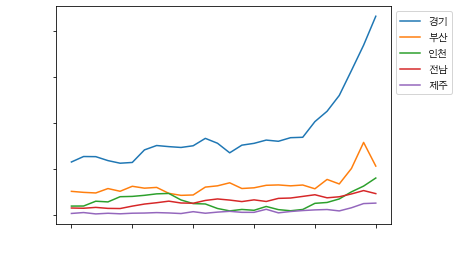

In [223]:
df_t[['경기', '부산', '인천', '전남', '제주']].plot()
plt.xlabel('연도', color='white')
plt.xticks(color='white')
plt.ylabel('배출량', color='white')
plt.yticks(color='white')
plt.legend(bbox_to_anchor=(1,1)) 


In [234]:
df_t_2diff = df_t[['경기', '부산', '인천', '전남', '제주']]


from statsmodels.tsa.stattools import adfuller

# 1차 차분의 p-value 값이 0.05 이상인 컬럼들을 저장할 리스트
not_significant_columns = []



for column in df_t_2diff.columns:
    y = df_t[column]
    y_1diff = df_t_2diff[column].diff().dropna()
    y_2diff = y_1diff.diff().dropna()
    print(f'{column} ADF Test')
    
    # 결측값이 있는 열은 제외하고 ADF 검정 수행
    if y.isnull().sum() > 0:
        print(f'{column} 칼럼에 결측값이 존재하여 분석을 수행할 수 없습니다.')
        print()
        continue
    
    # 원 데이터에 대한 ADF 검정 수행
    result = adfuller(y)
    print(f'원 데이터 ADF Statistic: {result[0]:.3f}')
    print(f'원 데이터 p-value: {result[1]:.3f}')
    
    # 1차 차분 데이터에 대한 ADF 검정 수행
    result = adfuller(y_1diff)
    print(f'1차 차분 ADF Statistic: {result[0]:.3f}')
    print(f'1차 차분 p-value: {result[1]:.3f}')
    print()
    
     # 2차 차분 데이터에 대한 ADF 검정 수행
    result = adfuller(y_2diff)
    print(f'2차 차분 ADF Statistic: {result[0]:.3f}')
    print(f'2차 차분 p-value: {result[1]:.3f}')
    print()
    print('---------------------------')
    # 1차 차분의 p-value 값이 0.05 이하인 컬럼을 significant_columns 리스트에 추가
    if result[1] >= 0.05:
        not_significant_columns.append(column)

# 1차 차분의 p-value 값이 0.05 이상인 컬럼들 출력
print("1차 차분의 p-value 값이 0.05 이상인 컬럼들:")
print(not_significant_columns)

    
 


경기 ADF Test
원 데이터 ADF Statistic: 6.129
원 데이터 p-value: 1.000
1차 차분 ADF Statistic: 1.079
1차 차분 p-value: 0.995

2차 차분 ADF Statistic: -6.221
2차 차분 p-value: 0.000

---------------------------
부산 ADF Test
원 데이터 ADF Statistic: 1.774
원 데이터 p-value: 0.998
1차 차분 ADF Statistic: -1.689
1차 차분 p-value: 0.437

2차 차분 ADF Statistic: -2.141
2차 차분 p-value: 0.228

---------------------------
인천 ADF Test
원 데이터 ADF Statistic: -0.139
원 데이터 p-value: 0.945
1차 차분 ADF Statistic: -0.508
1차 차분 p-value: 0.890

2차 차분 ADF Statistic: -5.090
2차 차분 p-value: 0.000

---------------------------
전남 ADF Test
원 데이터 ADF Statistic: -0.653
원 데이터 p-value: 0.859
1차 차분 ADF Statistic: -2.234
1차 차분 p-value: 0.194

2차 차분 ADF Statistic: -0.813
2차 차분 p-value: 0.815

---------------------------
제주 ADF Test
원 데이터 ADF Statistic: 0.849
원 데이터 p-value: 0.992
1차 차분 ADF Statistic: 2.109
1차 차분 p-value: 0.999

2차 차분 ADF Statistic: 0.104
2차 차분 p-value: 0.966

---------------------------
1차 차분의 p-value 값이 0.05 이상인 컬럼들:
['부산', '전남', '제주']


In [ ]:
df

팀원들과 역할 분담 하에서, 여러 모델 중 ARIMA 모델로 분석을 진행한다. 

ARIMA모델은 정상성을 전제로 하는 모델이므로 정상성을 확인해야 한다. 추세가 있다는 것은 평균이 시간에 따라 변한다는 것이므로 정상 시계열로 볼 수 없다. 따라서 차분을 진행하였. 1차 차분결과 p-value 값이 0.05 보다 작게 나왔으므로 정상성을 확보했다고 볼 수 있다. 

cf) 정상성 조건
- 평균이 일정할 것
- 분산이 일정할 것
- 공분산이 시점에 의존하지 않을 것 = 시차에만 의존할 것

​

In [178]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

<AxesSubplot:xlabel='년도'>

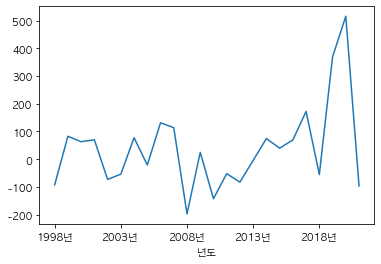

# 4. 모수 추정